### **SUPERVIVENCIA EN EL TITANIC**

### **Limpieza & Análisis de Datos**

In [141]:
import pandas as pd

df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

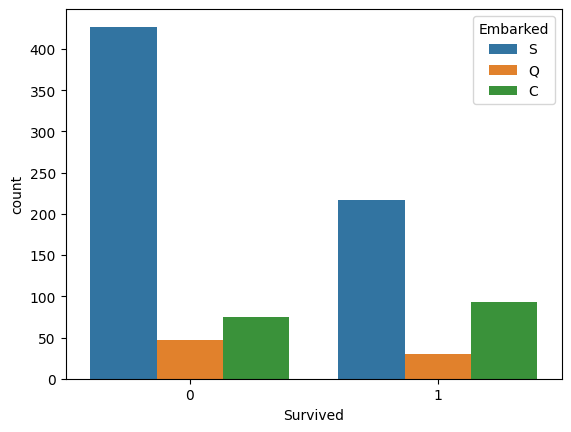

In [143]:
import seaborn as sb
sb.countplot(x='Survived', data=df, hue='Embarked')

<Axes: xlabel='Survived', ylabel='count'>

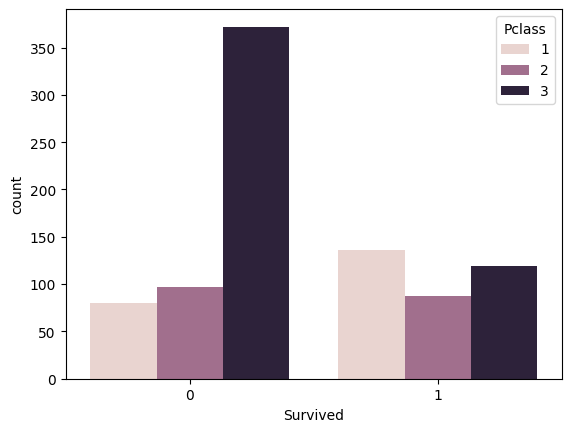

In [144]:
sb.countplot(x='Survived', data=df, hue='Pclass')

In [145]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [146]:
# Calcula la media de la columna 'Age' y usa ese valor para reemplazar los valores faltantes (NaN).
# Esto asegura que la columna no tenga valores nulos, lo que es importante para análisis y modelos.
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [147]:
# Eliminación de columnas que pueden impactar en la confusión de mi modelo.
df.drop(['PassengerId', 'Name',	'Ticket', 'Cabin'], axis=1, inplace=True)

In [148]:
# Los únicos datos nulos que quedaron hay que limpiarlos los cuales pertenecen a Embarked.
df = df.dropna()

In [149]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [150]:
# Convierte la columna 'Sex' en variables dummy usando 0 y 1, eliminando la primera categoría ('female')
# para evitar redundancia. Esto crea una columna 'male' donde 1 indica hombre y 0 indica mujer.
dummies_sex = pd.get_dummies(df['Sex'], dtype=int, drop_first=True)

In [151]:
# Convierte la columna 'Embarked' en variables dummy, asignando 0 y 1 para cada categoría excepto la primera.
# La categoría eliminada ('S') queda implícita para evitar redundancia.
# Esto crea columnas como 'C' y 'Q' donde 1 indica que el pasajero embarcó en esa localidad y 0 que no lo hizo.
dummies_embarked = pd.get_dummies(df['Embarked'], dtype=int, drop_first=True)

In [152]:
df = pd.concat([df, dummies_sex, dummies_embarked], axis=1)
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [153]:
df.head(15)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,29.699118,0,0,8.4583,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0


<Axes: >

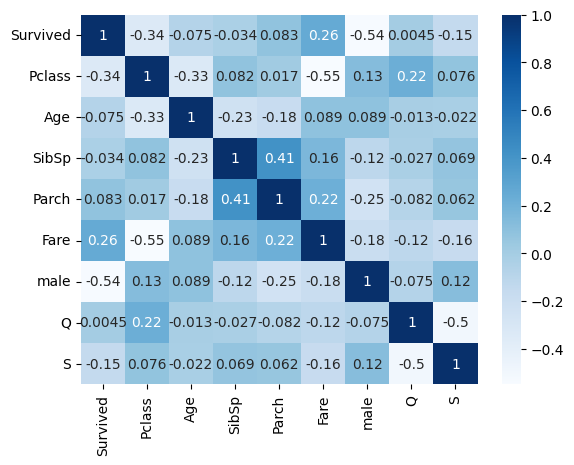

In [154]:
sb.heatmap(df.corr(), annot=True, cmap='Blues')

In [155]:
X = df.drop('Survived', axis=1) # Características de entrada
y = df['Survived'] # Etiqueta de salida

### **Entrenamiento con Regresión Logística**

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [157]:
miSupervivencia = model.predict([[1, 23, 0, 0, 70, 1, 0, 1]])
predicciones = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [158]:
miSupervivencia

array([1])

In [159]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicciones)

0.7584269662921348

In [160]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicciones)

array([[96, 15],
       [28, 39]])

### **Entrenamiento con Árbol de Decisión**

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(max_depth=5)
modelTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [162]:
predTree = modelTree.predict(X_test)

In [163]:
modelTree.score(X_test, y_test)

0.8202247191011236

[Text(0.4722222222222222, 0.9166666666666666, 'male <= 0.5\n0.465\n711\n[449, 262]\nMurió'),
 Text(0.24305555555555555, 0.75, 'Pclass <= 2.5\n0.393\n238\n[64, 174]\nSobrevivió'),
 Text(0.3576388888888889, 0.8333333333333333, 'True  '),
 Text(0.08333333333333333, 0.5833333333333334, 'Age <= 2.5\n0.12\n125\n[8, 117]\nSobrevivió'),
 Text(0.05555555555555555, 0.4166666666666667, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.1111111111111111, 0.4166666666666667, 'Age <= 56.0\n0.107\n124\n[7, 117]\nSobrevivió'),
 Text(0.05555555555555555, 0.25, 'Fare <= 28.856\n0.094\n122\n[6, 116]\nSobrevivió'),
 Text(0.027777777777777776, 0.08333333333333333, '0.168\n54\n[5, 49]\nSobrevivió'),
 Text(0.08333333333333333, 0.08333333333333333, '0.029\n68\n[1, 67]\nSobrevivió'),
 Text(0.16666666666666666, 0.25, 'Fare <= 42.875\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.1388888888888889, 0.08333333333333333, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.19444444444444445, 0.08333333333333333, '0.0\n1\n[0, 1]\nSobrevivió'),
 Text(0.402777777777

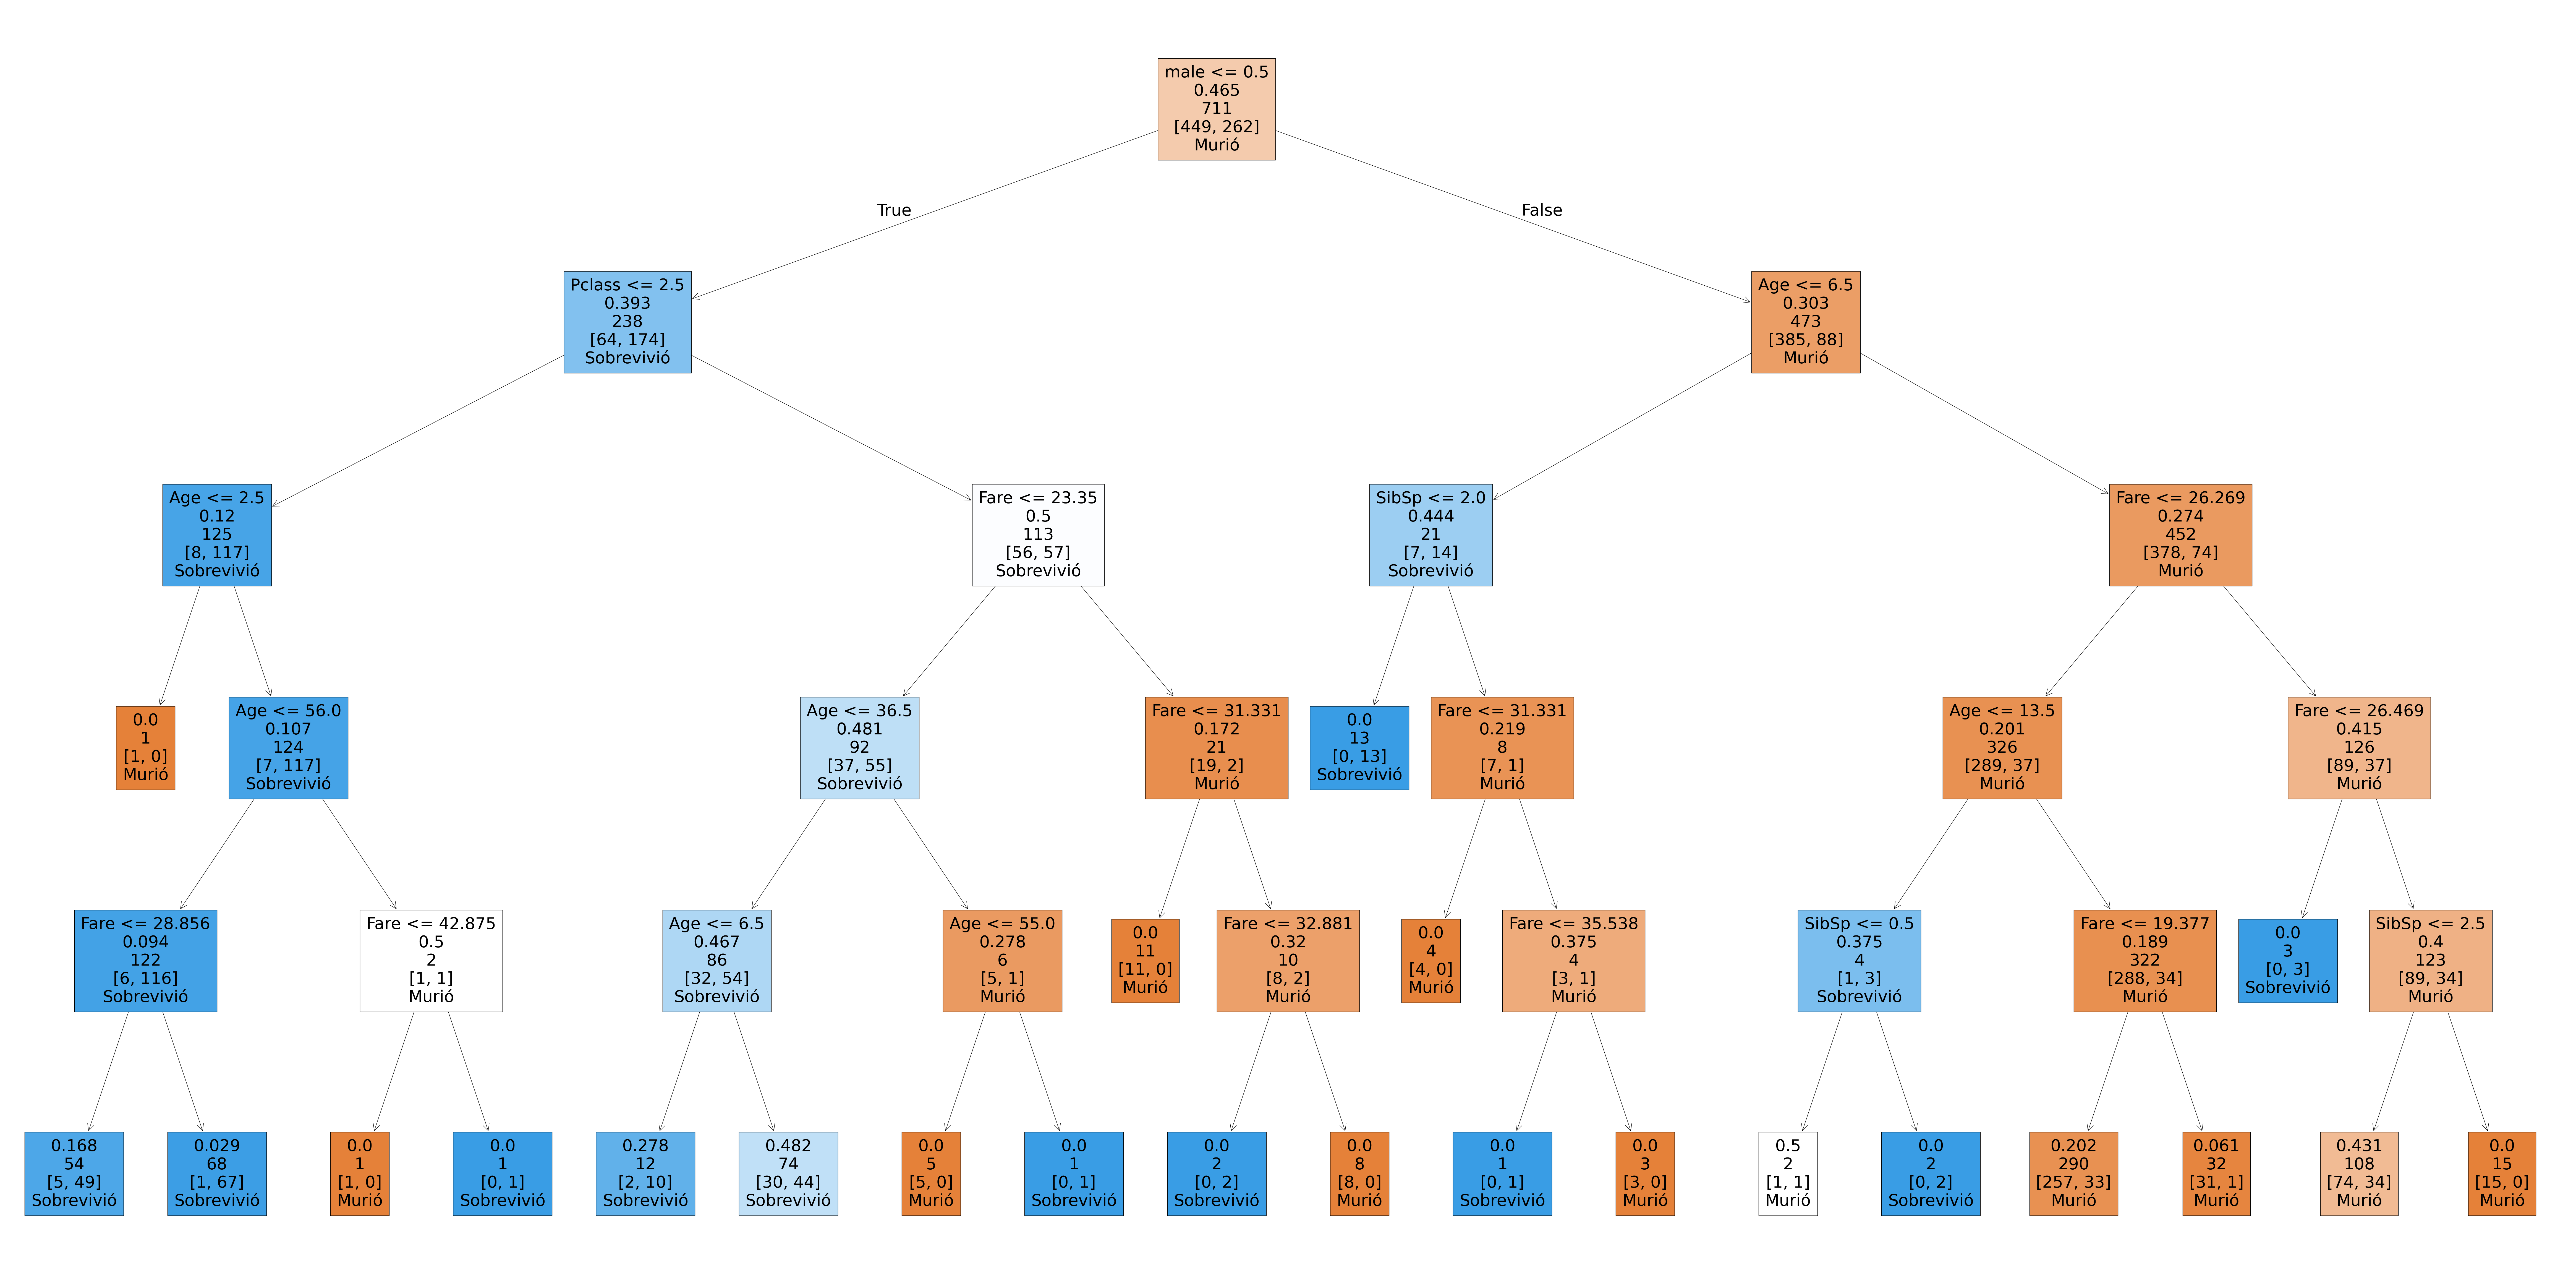

In [164]:
# Representación del Árbol de Decisión
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize = (120, 60))
plot_tree(
    modelTree,
    feature_names = X_train.columns,
    class_names = ['Murió', 'Sobrevivió'],
    filled = True,
    label = 'none'
)